In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=True)

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

2024-01-22 12:04:08,428 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2024-01-22 12:04:08,429 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-22 12:04:08,431 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2024-01-22 12:04:08,431 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-22 12:04:08,433 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2024-01-22 12:04:08,434 INFO sqlalchemy.engine.Engine [raw sql] ('measurement',)
2024-01-22 12:04:08,435 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("measurement")
2024-01-22 12:04:08,435 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-22 12:04:08,436 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("measurement")
2024-01-22 12:04:08,436 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-22 12:04:08,437 INFO sqlalchemy.engine.Engine SELECT sql

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

print(f"Most Recent Date: {most_recent_date}")



2024-01-22 12:04:12,034 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-01-22 12:04:12,039 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2024-01-22 12:04:12,040 INFO sqlalchemy.engine.Engine [generated in 0.00088s] (1, 0)
Most Recent Date: 2017-08-23


2024-01-22 12:22:44,149 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2024-01-22 12:22:44,150 INFO sqlalchemy.engine.Engine [cached since 1112s ago] (1, 0)
Most Recent Date: 2017-08-23
2024-01-22 12:22:44,154 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?
2024-01-22 12:22:44,154 INFO sqlalchemy.engine.Engine [cached since 1111s ago] ('2016-08-23 00:00:00.000000',)


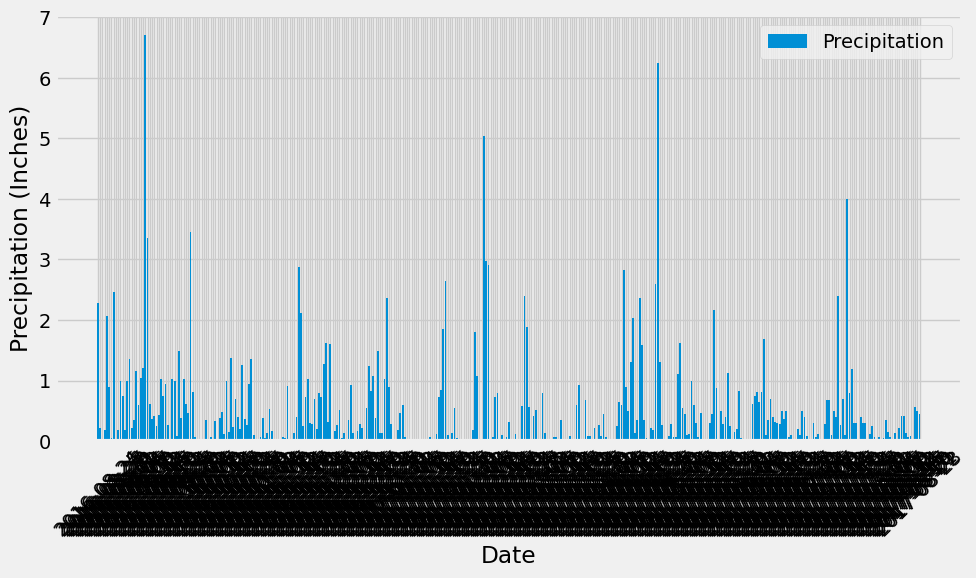

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


In [17]:
# Find the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

print(f"Most Recent Date: {most_recent_date}")

# Calculate the date one year from the last date in the dataset
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Create a query that collects only the date and precipitation for the last year of data without passing the date as a variable
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame to create date and precipitation columns
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame by date
precipitation_df = precipitation_df.sort_values(by='Date')

# Plot the results using the DataFrame plot method with date as the x and precipitation as the y variables
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.title('')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Use Pandas to print the summary statistics for the precipitation data
summary_stats = precipitation_df['Precipitation'].describe()
print(summary_stats)


In [15]:
# Calculate summary statistics for the precipitation data
summary_stats = precipitation_df['Precipitation'].describe()

# Print the summary statistics
print(summary_stats)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number of stations
total_stations = session.query(func.count(func.distinct(Measurement.station))).scalar()

# Print the total number of stations
print(f'Total number of stations: {total_stations}')


2024-01-20 16:54:01,210 INFO sqlalchemy.engine.Engine SELECT count(distinct(measurement.station)) AS count_1 
FROM measurement
2024-01-20 16:54:01,211 INFO sqlalchemy.engine.Engine [cached since 128.2s ago] ()
Total number of stations: 9


In [62]:
# Design a query to find the most active stations
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the stations and their counts in descending order
print("Most Active Stations:")
for station, count in most_active_stations:
    print(f"Station ID: {station}, Observations Count: {count}")


2024-01-20 16:54:31,349 INFO sqlalchemy.engine.Engine SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station) DESC
2024-01-20 16:54:31,350 INFO sqlalchemy.engine.Engine [cached since 111.2s ago] ()
Most Active Stations:
Station ID: USC00519281, Observations Count: 2772
Station ID: USC00519397, Observations Count: 2724
Station ID: USC00513117, Observations Count: 2709
Station ID: USC00519523, Observations Count: 2669
Station ID: USC00516128, Observations Count: 2612
Station ID: USC00514830, Observations Count: 2202
Station ID: USC00511918, Observations Count: 1979
Station ID: USC00517948, Observations Count: 1372
Station ID: USC00518838, Observations Count: 511


In [63]:
# Extract the most active station ID from the previous result
most_active_station_id = most_active_stations[0][0]

# Design a query to calculate the lowest, highest, and average temperature
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()

# Print the results
print(f"Most Active Station ID: {most_active_station_id}")
print(f"Lowest Temperature: {temperature_stats[0][0]}")
print(f"Highest Temperature: {temperature_stats[0][1]}")
print(f"Average Temperature: {temperature_stats[0][2]}")


2024-01-20 16:55:35,058 INFO sqlalchemy.engine.Engine SELECT min(measurement.tobs) AS min_1, max(measurement.tobs) AS max_1, avg(measurement.tobs) AS avg_1 
FROM measurement 
WHERE measurement.station = ?
2024-01-20 16:55:35,059 INFO sqlalchemy.engine.Engine [generated in 0.00146s] ('USC00519281',)
Most Active Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


2024-01-20 16:57:12,491 INFO sqlalchemy.engine.Engine SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station = ? AND measurement.date >= ?
2024-01-20 16:57:12,492 INFO sqlalchemy.engine.Engine [generated in 0.00100s] ('USC00519281', '2016-08-23 00:00:00.000000')


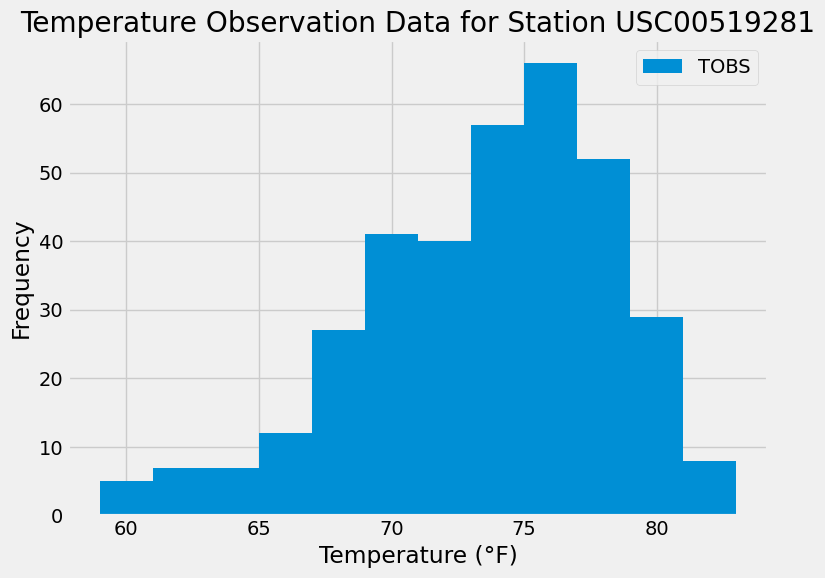

In [64]:
# Using the most active station id from the previous query
most_active_station_id = most_active_stations[0][0]

# Calculate the date one year from the last date in the dataset
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the TOBS data for the last 12 months for the most active station
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id, Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
tobs_df = pd.DataFrame(tobs_data, columns=['TOBS'])

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(tobs_df['TOBS'], bins=12, label='TOBS')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observation Data for Station {most_active_station_id}')
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
# Design a query to calculate the total number of stations
total_stations = session.query(func.count(func.distinct(Measurement.station))).scalar()

# Print the total number of stations
print(f'Total number of stations: {total_stations}')


2024-01-20 16:59:33,117 INFO sqlalchemy.engine.Engine SELECT count(distinct(measurement.station)) AS count_1 
FROM measurement
2024-01-20 16:59:33,119 INFO sqlalchemy.engine.Engine [cached since 460.1s ago] ()
Total number of stations: 9


# Close Session

In [71]:
# Close Session
session.close()

2024-01-20 17:01:08,382 INFO sqlalchemy.engine.Engine ROLLBACK
